How many positive and negative reviews are there in the IMDB movie reviews dataset?

In [2]:
import pandas as pd

movies = pd.read_csv('datasets/IMDB_sample.csv', index_col=None)

print(movies.head())

   Unnamed: 0                                             review  label
0       18245  This short spoof can be found on Elite's Mille...      0
1       19801  A singularly unfunny musical comedy that artif...      0
2        3222  An excellent series, masterfully acted and dir...      1
3        6010  The master of movie spectacle Cecil B. De Mill...      1
4       16355  I was gifted with this movie as it had such a ...      0


In [3]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


In [4]:
# Find the longest review in the review column of movies
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


In [5]:
# Find the shortest review in the review column of movies
print(min(length_reviews))

52


Detect the sentiment from strings

In [16]:
two_cities = open('datasets/two_cities.txt', 'r').read()

In [17]:
print(two_cities)

It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.


In [18]:
from textblob import TextBlob

#Create a textblob object
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


In [99]:
annak = open('datasets/annak.txt', 'r').read()

catcher = open('datasets/catcher.txt', 'r').read()

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


In [19]:
titanic_review = open('datasets/titanic_review.txt', 'r').read()

In [20]:
# Create a textblob object  
blob_titanic = TextBlob(titanic_review)

# Print out its sentiment  
print(blob_titanic.sentiment)


Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


Building a word cloud

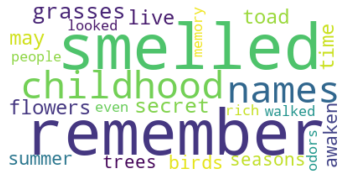

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

east_of_eden = open('datasets/east_of_eden.txt', 'r').read()

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

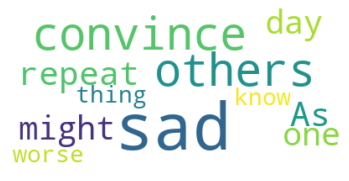

In [13]:
#string
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

#create cloud
cloud_illuminated = WordCloud(background_color='white').generate(illuminated)

#display cloud
plt.imshow(cloud_illuminated, interpolation='bilinear')
plt.axis('off')

plt.show()

In [95]:
# build a wordcloud from the top 100 positive reviews in movies
descriptions = open('datasets/descriptions.txt', 'r').read()

# movie-specific set of stopwordss from stop_words.py file
import sys
from my_stopwords import my_stopwords


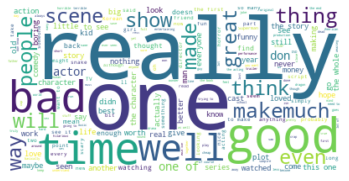

In [96]:
# Create and generate a word cloud image 

my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

Learning Bag-of-words

In [100]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


In [105]:
# import amazon reviews as reviews
reviews = pd.read_csv('datasets/amazon_reviews_sample.csv')

In [106]:
# create BOW from reviews
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


In [110]:
# Specify token sequence length in BOW of reviews
# Build the vectorizer, specify token sequence and fit
vect1 = CountVectorizer(ngram_range=(1, 2))
vect1.fit(reviews.review)

# Transform the review column
X_review1 = vect1.transform(reviews.review)

# Create the bow representation
X_df1 = pd.DataFrame(X_review1.toarray(), columns=vect1.get_feature_names())
print(X_df1.head())

   00  00 and  00 apiece  00 as  00 back  00 bad  00 bucks  00 cheaper  00 do  \
0   0       0          0      0        0       0         0           0      0   
1   0       0          0      0        0       0         0           0      0   
2   0       0          0      0        0       0         0           0      0   
3   0       0          0      0        0       0         0           0      0   
4   0       0          0      0        0       0         0           0      0   

   00 does  ...  étai fidèle  était  était pas  étre  étre publié  éviter  \
0        0  ...            0      0          0     0            0       0   
1        0  ...            0      0          0     0            0       0   
2        0  ...            0      0          0     0            0       0   
3        0  ...            0      0          0     0            0       0   
4        0  ...            0      0          0     0            0       0   

   última  última parte  única  única opción  
0  

In [112]:
# size of vocabulary of movies reviews refer to movies from IMDB dataset

# limit size of vocabulary to 100
# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]


In [114]:
# limit size of vocabulary to include terms which occur in no more than 200 documents
# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]


In [115]:
# limit size of vocabulary to ignore terms which occur in less than 50 documents
# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]


In [116]:
# using reviews to build another BOW with n-grams and vocabulary size
# Build the vectorizer and make sure to specify the following parameters: 
# the size of the vocabulary should be limited to 1000, 
# include only bigrams, 
# and ignore terms that appear in more than 500 documents.

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  